In [1]:
using Plots

In [2]:
## The polynomial
yi = [2,3,6]
xi = [1,2,3]
xx = linspace(0,4,100)


 


linspace(0.0,4.0,100)

polyfit([1,2,3.0],[1,4.0,9],2) = [0.0,0.0,1.0]
polyval([0.0,0.0,1.0],[0.5,4.0]) = [0.25,16.0]
[Plots.jl] Initializing backend: pyplot



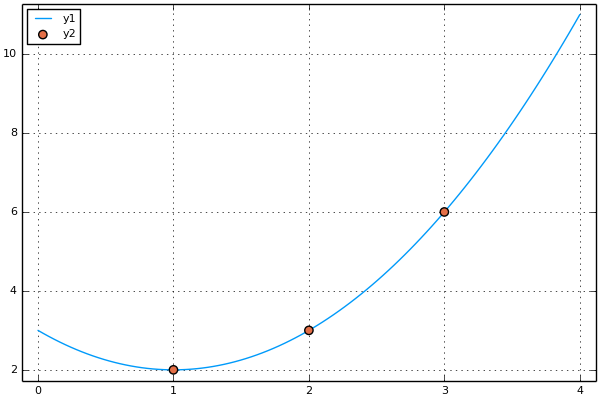

In [3]:
"""fit the coefficients of a polynomial interpolant
c = polyfit(x,y,n) fits a degree n polynomial to the
data poly(x,c)"""
function polyfit(x,y,n)
    m = length(x) # datapoints
    Z = zeros(m,n+1)
    for i=1:m # Should fill this out columnwise.
        xi = 1.
        for j=1:n+1
            Z[i,j] = xi
            xi *= x[i]
        end
    end
    return Z\y
end
""" Evaluate a polynomial vs. Horner's rule """
function polyval(c,x)
    # based on Matlab's Horner's rule 
    m = length(x)
    y = zeros(m)
    
    if length(c) > 0
        y[:] = c[end]
    end
    for i=2:length(c)
        y = x .* y + c[end-i+1]
    end
    return y
end
@show polyfit([1,2,3.],[1,4.,9],2)
@show polyval([0.,0.,1.],[0.5,4.])

## Monomial form from class 
c = polyfit(xi,yi,2)
yyp = polyval(c,xx)
plot(xx,yyp); scatter!(xi,yi)



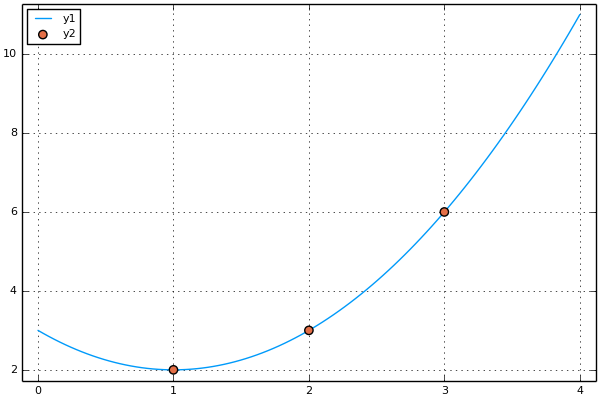

In [6]:
""" 
`lagrange_interp`: lagrange_interp(x, xi, yi)
y = lagrange_interp(x,xi,yi) uses the data from xi,yi to build the
Lagrange interpolant and then evaluates that interpolant at the points
x, returning the interpolated values y.
"""     
function lagrange_interp(x, xi, yi)
  y = zeros(size(x))
  for i=1:length(yi)
    elli = ones(size(x))
    for j=1:length(xi)
      if i==j continue; end
      elli = elli.*(x-xi[j])/(xi[i] - xi[j])
    end
    y = y + yi[i]*elli
  end
  return y
end
## Lagrange form
yyl = lagrange_interp(xx,xi,yi);
plot(xx,yyl); scatter!(xi,yi)




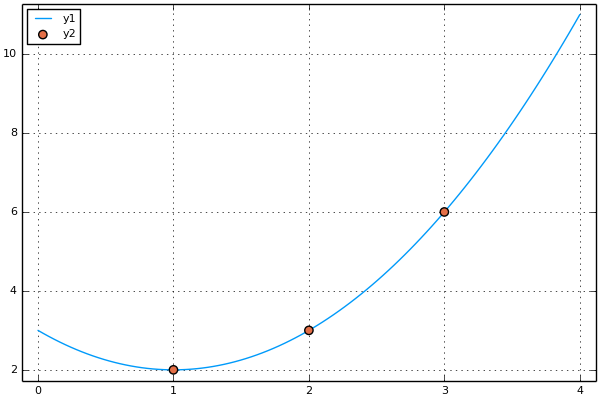

In [5]:
function compute_barycentric_weights(xi)
  ws = zeros(size(xi))
  for i=1:length(xi)
    w = 1.0
    for j=1:length(xi)
      if j==i continue; end
      w = w*1.0/(xi[i] - xi[j])
    end
    ws[i] = w
  end
  return ws
end  
function barycentric_interp_with_weights(x,xi,fi,wi)
  ynumer = zeros(size(x))
  ydenom = zeros(size(x))
  for i=1:length(xi)
    ynumer += yi[i].*wi[i]./(x - xi[i])
    ydenom += wi[i]./(x - xi[i])
  end
  y = ynumer./ydenom
end
""" 
`barycentric_interp`: barycentric_interp(x, xi, yi)
y = barycentric_interp(x,xi,yi) uses the data from xi,yi to build the
Lagrange interpolant in the Barycentric form, and 
then evaluates that interpolant at the points x, 
returning the interpolated values y. 
"""     
function barycentric_interp(x,xi,fi)
  return barycentric_interp_with_weights(x,xi,fi,
    compute_barycentric_weights(xi))
end


## Barycentric form
yyb = barycentric_interp(xx,xi,yi);
plot(xx,yyb); scatter!(xi,yi)